## Modelling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay

In [2]:
initial_df=pd.read_csv('original_data_with_encoding.csv')
x_resampled=pd.read_csv('resampled_without_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')
standard_scale_data=pd.read_csv('standard_scale_resampled_with_encoding.csv')
min_max_scale_data=pd.read_csv('min_max_resampled_with_encoding.csv')

### Data without Resampling

In [3]:
X = initial_df.drop('target',axis=1).values
Y = initial_df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [4]:
lr = LogisticRegression()

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred=lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Time taken to fit the model in sec is  13.915316600000011
[[114633      0]
 [  4410      0]]


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred):.4f}")

Accuracy score:0.9630


* 1) If there is no oversampling the accuracy is 96.3.But as data is imbalanced data we don't need accuracy.Because majority of them are negative and model predicted all values as negative and so accuracy is high


In [6]:
print(f1_score(y_test, y_pred))

0.0


* 2) f2 score is 0 as there are no predicted values either correctly predicted (True positives)or wrongly predicted(False positives) as positive.
*    The accuracy is high as there are so many negatives and all values are predicted as negative

In [7]:
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Recall score : 0.0000
Precision score : 0.0000


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




* 3) Precision and recall values are 0

### Most Inference

* 4) All values are precited as negative as majority of values in dataset is negative.We are missing positive cases
So oversampling is needed to overcome this problem





### Data with Resampling and without OneHotEncoding

In [8]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [9]:
lr = LogisticRegression()

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred=lr.predict(X_test)

Time taken to fit the model in sec is  13.047959399999996


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred):.4f}")

Accuracy score: 0.8822
F1 score : 0.8788
Recall score : 0.8519
Precision score : 0.9076


<AxesSubplot:>

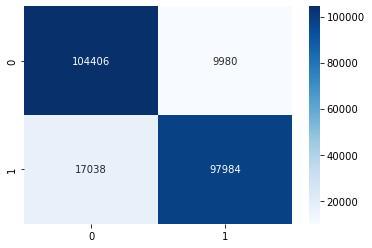

In [11]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='', cmap='Blues')

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89    114386
           1       0.91      0.85      0.88    115022

    accuracy                           0.88    229408
   macro avg       0.88      0.88      0.88    229408
weighted avg       0.88      0.88      0.88    229408



In [13]:
y_pred1=lr.predict(X_train)
print(f"Accuracy score: {accuracy_score(y_train, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred1):.4f}")

Accuracy score: 0.8818
F1 score : 0.8781
Recall score : 0.8519
Precision score : 0.9059


In [14]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

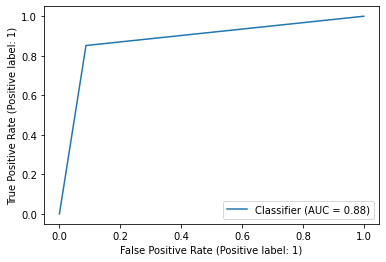

In [15]:
RocCurveDisplay.from_predictions(y_test, y_pred)

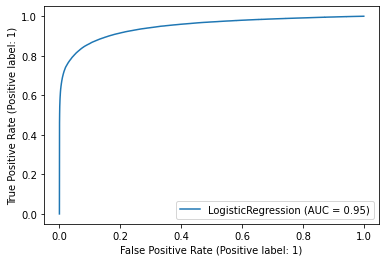

In [16]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

### Data with Resampling and with OneHotEncoding

* StandardScaling Data

In [17]:
X = standard_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

In [18]:
lr1 = LogisticRegression()

start_time = timeit.default_timer()
lr1.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred1=lr1.predict(X_test1)


Time taken to fit the model in sec is  28.0657157


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(f"Accuracy score: {accuracy_score(y_test1, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test1, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test1, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test1, y_pred1):.4f}")

Accuracy score: 0.9025
F1 score : 0.8997
Recall score : 0.8717
Precision score : 0.9295


<AxesSubplot:>

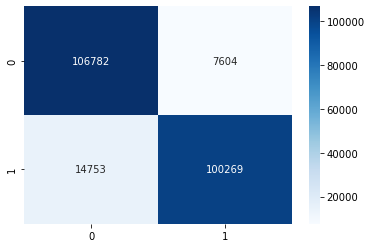

In [20]:
sns.heatmap(confusion_matrix(y_test1,y_pred1),annot=True, fmt='', cmap='Blues')

In [21]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408



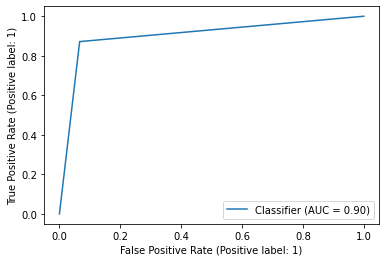

In [22]:
RocCurveDisplay.from_predictions(y_test1, y_pred1)

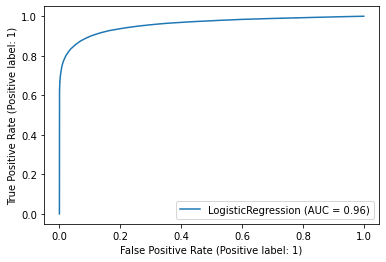

In [23]:
RocCurveDisplay.from_estimator(lr1, X_test1, y_test1)

In [24]:
y_pred1=lr1.predict(X_train)
print(f"Accuracy score: {accuracy_score(y_train, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred1):.4f}")

Accuracy score: 0.9030
F1 score : 0.8999
Recall score : 0.8718
Precision score : 0.9297


##### MinMaxScaled data

In [25]:
X = min_max_scale_data.values
Y = np.squeeze(y_resampled.values)
X_train,X_test2,y_train,y_test2=train_test_split(X,Y,test_size=0.2,random_state=10)

In [26]:
lr2 = LogisticRegression()

start_time = timeit.default_timer()
lr2.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

y_pred2=lr2.predict(X_test2)


Time taken to fit the model in sec is  28.6182235


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
print(f"Accuracy score:{accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score:0.9025
F1 score : 0.8997
Recall score : 0.8717
Precision score : 0.9294


<AxesSubplot:>

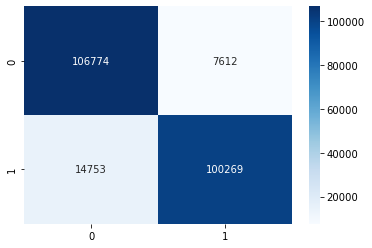

In [28]:
sns.heatmap(confusion_matrix(y_test2,y_pred2),annot=True, fmt='', cmap='Blues')

In [29]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408



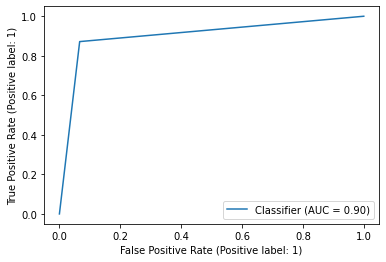

In [30]:
RocCurveDisplay.from_predictions(y_test2, y_pred2)

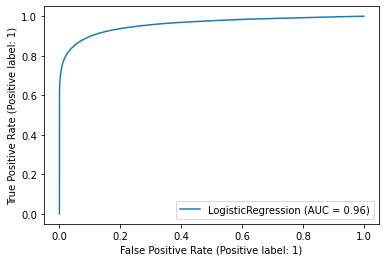

In [31]:
RocCurveDisplay.from_estimator(lr2, X_test2, y_test2)

In [32]:
y_pred1=lr2.predict(X_train)
print(f"Accuracy score: {accuracy_score(y_train, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_train, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_train, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_train, y_pred1):.4f}")

Accuracy score: 0.9031
F1 score : 0.8999
Recall score : 0.8719
Precision score : 0.9297


### One Hot Encoding improved accuracy

* 5) The accuracy score is 0.9024 and f1_score is 0.90 for both standard scaling and minmax scaling
* 6) f1_score is improved as data is balanced data due to oversampling



### Performing Cross Validation

In [26]:
lr = LogisticRegression(solver='sag',max_iter=200)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(lr, X, Y, cv=5,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  420.47019939999996
Time taken to perform cv for the model in sec is  2066.6223652999997
Cv2 scores: [0.3639629  0.66914697 0.67177985 0.67172754 0.67385476]
Mean 5-Fold R Squared: 0.6100944051675657


In [35]:
lr = LogisticRegression(solver='sag',max_iter=200)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

start_time = timeit.default_timer()
#perform k fold
cv_r2_scores_rf = cross_val_score(lr, X, Y, cv=10,scoring='r2')
elapsed = timeit.default_timer() - start_time
print("Time taken to perform cv for the model in sec is ",elapsed)

print("Cv2 scores:",cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

Time taken to fit the model in sec is  323.1318456
Time taken to perform cv for the model in sec is  3972.1788487000003
Cv2 scores: [0.05429628 0.67157205 0.67296694 0.66616683 0.67317618 0.67226949
 0.67341743 0.67317333 0.67714881 0.67275485]
Mean 5-Fold R Squared: 0.6106942185826653


* We see that the metrics for all folds in cross_val_score are uniform so it can be concluded that the model is able to generalise

### Solving Convergence warning

In [38]:
lr = LogisticRegression(max_iter=700)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  190.6561941


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
lr = LogisticRegression(solver='saga',max_iter=200)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)


Time taken to fit the model in sec is  509.52083519999996


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
lr = LogisticRegression(solver='saga',max_iter=300)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  660.5318058000003


In [34]:
y_pred2=lr.predict(X_test2)
cnf_matrix = confusion_matrix(y_test2, y_pred2)
cnf_matrix

array([[106776,   7610],
       [ 14756, 100266]], dtype=int64)

In [35]:
print(f"Accuracy score:{accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score:0.9025
F1 score : 0.8997
Recall score : 0.8717
Precision score : 0.9295


In [44]:
lr = LogisticRegression(solver='sag',max_iter=100)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  242.88613199999963


C:\Users\Raghavendra Reddy\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [42]:
lr = LogisticRegression(solver='sag',max_iter=200)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  342.7288783999993


In [43]:
y_pred2=lr.predict(X_test2)
cnf_matrix = confusion_matrix(y_test2, y_pred2)
cnf_matrix

array([[106776,   7610],
       [ 14756, 100266]], dtype=int64)

In [39]:
lr = LogisticRegression(solver='sag',max_iter=300)

start_time = timeit.default_timer()
lr.fit(X_train,y_train)
elapsed = timeit.default_timer() - start_time
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  337.0517337000001


In [40]:
y_pred2=lr.predict(X_test2)
cnf_matrix = confusion_matrix(y_test2, y_pred2)
cnf_matrix

array([[106776,   7610],
       [ 14756, 100266]], dtype=int64)

In [41]:
print(f"Accuracy score:{accuracy_score(y_test2, y_pred2):.4f}")
print(f"F1 score : {f1_score(y_test2, y_pred2):.4f}")
print(f"Recall score : {recall_score(y_test2, y_pred2):.4f}")
print(f"Precision score : {precision_score(y_test2, y_pred2):.4f}")

Accuracy score:0.9025
F1 score : 0.8997
Recall score : 0.8717
Precision score : 0.9295


### Sag  and Saga resolved the issue convergence warning

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

* But what is algorithm convergence?

* In simple words. If the error of solving is ranging within very small range (i.e., it is almost not changing), then that means the algorithm reached the solution (not necessary to be the best solution as it might be stuck at what so-called "local Optima").

* On the other hand, if the error is varying noticeably (even if the error is relatively small [like in your case the score was good], but rather the differences between the errors per iteration is greater than some tolerance) then we say the algorithm did not converge.

* lbfgs has better convergence on relatively small datasets.

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406
* sag-It is faster than other solvers for large datasets when both the number of samples and the number of features are large.